# Data Parsing Class

In [1]:
import pandas as pd
import itertools

class dataParsing:
    
    def __init__(self):
        self.X = pd.DataFrame()
        self.Y = pd.DataFrame()
        self.data = pd.DataFrame()
        self.labels = False
        self.targets = ['Unaided_Branding', 'Brand_Cues__Mean','Aided_Branding__Mean',
           'Active_Involvement__Mean','New_Information__Mean', 'Enjoyment__Mean',
           'Brand_Appeal__Mean', 'Understanding__Mean','Relevance_of_Information__Mean',
           'Credibility_of_Information__Mean',
           'Brand_Difference__Mean']
        
    def separate_X_Y(self):
        for tr in self.targets:
            for col in self.data.columns:
                if tr in col:
                    self.Y[tr] = self.data[col]
                else:
                    self.X[col] = self.data[col]

        return self.X,self.Y
            
    
    def load_data(self,path_to_file = None,sheet_name="Data",labels=True):
        
        if path_to_file:
            self.data = pd.read_excel(path_to_file,sheet_name=sheet_name)
            X,Y = self.separate_X_Y()
            return X,Y
        else:
            print("Please provide path to file\n")
            return None
            
    def load_Y(self,path_to_file=None):
        if path_to_file:
            Y_data = pd.read_excel(path_to_file,sheet_name=0)
            for tr in self.targets:
                for col in Y_data.columns:
                    if tr[:3] in col:
                        self.Y[tr] = Y_data[col]
        else:
            print("Please provide path to file\n")

        return self.Y
                        
    def isLabels(self):
        if self.Y.shape[0]!=0 :
            return True
        return False
    

# Utils Class

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
class Utils:
    def __init__(self):
        self.figsize = 32
        
    def plotCorr(self,df):
        """Derives & plots correlation between supplied series"""
        oCorr = df.corr()
        fig, ax = plt.subplots(figsize=(self.figsize, self.figsize))
        ax.matshow(oCorr)
        plt.yticks(range(len(oCorr.columns)), oCorr.columns);
        plt.xticks(range(len(oCorr.columns)), oCorr.columns);
            #sns.heatmap(oCorr, xticklabels=oCorr.columns.values, yticklabels=oCorr.columns.values)
            #oCorr.style.background_gradient(cmap='coolwarm').set_precision(2)

    #######################################

    def plotCorrSNSreg(self,df):
        """Derives & fit a reg along with distribution between supplied series"""
        try:
            x = sns.pairplot(df.dropna(), diag_kind="kde", kind="reg")
            #x.map_lower(corrfunc)
            plt.show()
        except:
            pass

    #######################################

    def plotCorrSNSvalue(self,df, x):
        """Derives & plots correlation between supplied series"""
        try:
            plt.figure(figsize=(self.figsize,self.figsize))
            sns.heatmap(df.dropna().corr(), annot=x)
            plt.show()
        except:
            pass

    #######################################   

    def nullPer(self,df):
        """Quantifies missing values"""
        try:        
            return(df.isnull().mean()*100)
        except:
            pass

    #######################################

    def uniVar(self,x):
        """Computes univariate matrics"""
        try: 
            print(x.describe())
            print("Skewness: %f" % x.skew())
            print("Kurtosis: %f" % x.kurt())
        except:
            pass

    #######################################

    def edaScatter(self,x):
        """Renders Scatter plot (Multivariate)"""
        fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
        try:    
            for i in range(1, len(yDF.columns)):
                fig.add_subplot(5, 5, i)
                plt.scatter(x=xDF[x], y=yDF.iloc[:, i], alpha=0.5)
                plt.title(yDF.columns[i])
        except:
            pass

    #######################################

    def edaCat(self,x):
        """Renders Scatter plot (Multivariate - categorical)"""
        fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
        try:      
            for i in range(1, len(yDF.columns)):
                fig.add_subplot(5, 5, i)
                plt.scatter(x=xDF[x].astype("category"), y=yDF.iloc[:, i], alpha=0.5)
                plt.title(yDF.columns[i])
        except:
            pass

    #######################################

    def imputeMedian(self,df, x):
        """Imputes median - treatement for missing values in Pandas series"""
        try:
            df[x].fillna(df[x].median(), inplace = True)
            return df[x]
        except:
            return df[x]
            pass

# Feature Engineering Class

In [3]:
class featureEngineering(dataParsing):
    
    def __init__(self,related_brand="microsoft"):
        super().__init__()
        self.feature_columns = ['Video Name', 'Country_AU', 'Country_UK', 'Country_US',
       'length_of_ad_15', 'ad_type_tv', ' Female_frame_count',
       ' Male_frame_count', ' Female_dur', ' Male_dur',
       'Age: 0-15_frame_count', 'Age: 0-5_frame_count',
       'Age: 15-24_frame_count', 'Age: 25-34_frame_count',
       'Age: 35-44_frame_count', 'Age: 45-60_frame_count',
       'Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'African_frame_count',
       'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_dur', 'Caucasian_dur',
       'Eastasian_dur', 'Latino_dur', 'microsoft', 'microsoft_dur',
       'microsoft_first_ocr', 'microsoft_last_ocr', 'microsoft_total_ocr',
       'Intel_dur', 'Intel_first_ocr', 'Intel_last_ocr',
       'Intel_total_ocr', 'ASUS T102', 'Dell PCs', 'Dell XPS',
       'Dell XPS 13', 'HP Spectre x360', 'HP Spectre x360, Windows',
       'Lenovo PCs', 'Lenovo Yoga 720', 'Lenovo Yoga 910', 'MacBook Air',
       'MacBook Pro', 'Macbook Air', 'Microsoft Surface', 'Suface Laptop',
       'Surface Book', 'Surface Go', 'Surface Laptop', 'Surface Pen',
       'Surface Pro', 'Surface Pro 4',
       'Surface Pro 4, Apple_MacBookAir13',
       'Surface Pro 4, HP Spectre x360', 'Surface Pro 4, MacBook Air',
       'Surface Pro 4, MacBook Air13, MacBook Air',
       'Surface Pro 4, Surface Book', 'Surface Pro 4, Windows 10',
       'Surface Pro 6', 'Surface laptop', 'Surface pro 4',
       'The new Surface Pro', 'The surface Laptop', 'Windows',
       'Windows 10', 'Windows 10 PC', 'Windows 10 PCs',
       'Windows 10, HP_Spectre', 'Windows 10, Windows', 'Yoga',
       'ASUS T102_dur', 'Dell PCs_dur', 'Dell XPS_dur', 'Dell XPS 13_dur',
       'HP Spectre x360_dur', 'HP Spectre x360, Windows_dur',
       'Lenovo PCs_dur', 'Lenovo Yoga 720_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Suface Laptop_dur', 'Surface Book_dur',
       'Surface Go_dur', 'Surface Laptop_dur', 'Surface Pen_dur',
       'Surface Pro_dur', 'Surface Pro 4_dur',
       'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface Pro 6_dur', 'Surface laptop_dur', 'Surface pro 4_dur',
       'The new Surface Pro_dur', 'The surface Laptop_dur', 'Windows_dur',
       'Windows 10_dur', 'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Lenovo Yoga 720_first_ocr', 'Lenovo Yoga 720_last_ocr',
       'Lenovo Yoga 720_total_ocr', 'Dell PCs_first_ocr',
       'Dell PCs_last_ocr', 'Dell PCs_total_ocr',
       'Surface Laptop_first_ocr', 'Surface Laptop_last_ocr',
       'Surface Laptop_total_ocr', 'The new Surface Pro_first_ocr',
       'The new Surface Pro_last_ocr', 'The new Surface Pro_total_ocr',
       'Surface Pro_first_ocr', 'Surface Pro_last_ocr',
       'Surface Pro_total_ocr', 'Suface Laptop_first_ocr',
       'Suface Laptop_last_ocr', 'Suface Laptop_total_ocr',
       'Surface laptop_first_ocr', 'Surface laptop_last_ocr',
       'Surface laptop_total_ocr', 'The surface Laptop_first_ocr',
       'The surface Laptop_last_ocr', 'The surface Laptop_total_ocr',
       'Surface Go_first_ocr', 'Surface Go_last_ocr',
       'Surface Go_total_ocr', 'Surface Pro 6_first_ocr',
       'Surface Pro 6_last_ocr', 'Surface Pro 6_total_ocr',
       'Dell XPS_first_ocr', 'Dell XPS_last_ocr', 'Dell XPS_total_ocr',
       'Lenovo PCs_first_ocr', 'Lenovo PCs_last_ocr',
       'Lenovo PCs_total_ocr'] 
        self.target_columns = self.targets
        
        self.brands_columns=["Intel","Apple","ASUS T102","Hp","Dell"]
        self.related_brand = related_brand
    
        
    def addUnrelatedBrands(self,X,brands_columns=None):
        if isinstance(brands_columns,list) == False:
            brands_columns = self.brands_columns
        for param in ['_dur','_first_ocr','_last_ocr','_total_ocr']:
            unrelated_columns = [col+param for col in brands_columns]
            X['Unrelated'+param] = X[X.loc[:,unrelated_columns].columns].sum(axis=1)
            X = X.drop(unrelated_columns,axis=1)
        
        return X
    
    def renameRelatedBrand(self,X,brand_name=None):
        if isinstance(brand_name,str) == False:
            brand_name = self.related_brand
        columns = [brand_name+col for col in ['','_dur','_first_ocr','_last_ocr','_total_ocr']]
        X.rename(columns=dict(zip(columns, ['Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
            'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)
        return X
    
    def addNewFeature(self,X,columns=None,_type='per',new_column_name=None,):
        if isinstance(columns,list):
            if _type =='sum':
                X[new_column_name] = X[X.loc[:,_columns].columns].sum(axis=1)
            else:
                for feature in columns:
                    index_1,index_2 = feature[0].rfind("_frame_count"),feature[1].rfind("_frame_count")
                    split_1,split_2 = feature[0][:index_1],feature[1][:index_2]
                    try:
                        X.insert(len(X.columns)-12,split_1+"_"+split_2+"_frame_count",X[feature[1]]/X[feature[0]])
                    except:
                        X[split_1+"_"+split_2+"_frame_count"] = X[feature[1]]/X[feature[0]]
        else:
            print("Please provide columns names and new column name")
        return X
    
    def clean_data(self,X,Y):
        return X.loc[:,self.feature_columns]
    
    def correlation_matrix(self,X):
        self.utils.plotCorr(X)
                  

# Data Preprocessing Class

In [4]:
from imblearn.over_sampling import SMOTE
import numpy as np

class DataPreprocessing(featureEngineering):
    
    def __init__(self):
        super().__init__()
        self.utils = Utils()
        
    def checkNull(self,df):
        return self.utils.nullPer(df).sort_values(ascending=False)
    
    def removeNULLColumns(self,df,percentage=0.7):
        return df.loc[:, self.utils.nullPer(df)< percentage*100]
    
    def replace(self,df,replace_this,replace_with):
        return df.replace(replace_this,replace_with)
    
    def imputeMedian(self,df,columns=None):
        if isinstance(columns,list)==False:
            columns = ["Related_Brand"+col for col in ['_frame_count','_dur','_first_ocr','_last_ocr','_total_ocr']]
        
        for col in columns:
            df[col] = self.utils.imputeMedian(df,col)
        return df
    
    def imputeConstant(self,df,columns=None,constant=0):
        if isinstance(columns,list) == False:
            return df.fillna(constant)
        return df[columns].fillna(constant)
    
    def normalize(self,df,axis):
        return normalize(df,axis=1)
    
    def overSampling(self,xDF,yDF,col_as_label = 'length_of_ad_15',each_Col = False,rmCols = ['Video Name','length_of_ad_15'],size=400,random_state=None):
        sm = SMOTE(sampling_strategy = {0:size//2,1:size//2},random_state=random_state)
        labels = xDF.loc[:,col_as_label]
        if each_Col == False:
            temp_inp_df = pd.concat([xDF,yDF],1).drop(rmCols,1)
        else:
            temp_inp_df = pd.concat([xDF,yDF],1)
        X_res, y_res = sm.fit_resample(temp_inp_df,labels)
        
        resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
        resamp_target_df = pd.DataFrame(y_res,columns=['length_of_ad_15'])
        resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
        resamp_data_df['Video Name'] = self.data['Video Name']
        resamp_inputs_df = resamp_data_df[xDF.columns]
        resamp_target_df = resamp_data_df[yDF.columns]
        
        return resamp_inputs_df,resamp_target_df

In [5]:
preprocessData = DataPreprocessing() 

In [6]:
X,Y = preprocessData.load_data('./MSFT_Agg_Data_30052019_2.xlsx',sheet_name='Sheet1',labels=False)
Y = preprocessData.load_Y('./Updated_targets_300519.xlsx')

In [7]:
X = X.drop(60)

In [8]:
X.head(65)

,Video Name,Country_AU,Country_UK,Country_US,length_of_ad_15,ad_type_tv,Female_frame_count,Male_frame_count,Female_dur,Male_dur,...,Surface Go_total_ocr,Surface Pro 6_first_ocr,Surface Pro 6_last_ocr,Surface Pro 6_total_ocr,Dell XPS_first_ocr,Dell XPS_last_ocr,Dell XPS_total_ocr,Lenovo PCs_first_ocr,Lenovo PCs_last_ocr,Lenovo PCs_total_ocr
0,185 Brand Moments_Microsoft_US_60_Learning Too...,NaN,NaN,1.0,0,1,20.0,34.0,10.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200 Win10_US_30_Toney_TV,NaN,NaN,1.0,0,1,0.0,13.0,0.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201 Win10_UK_30_Toney_TV,NaN,1.0,NaN,0,1,0.0,13.0,0.0,6.5,...,NaN,NaN,NaN,NaN,26.0,28.5,1.0,NaN,NaN,NaN
3,202 Win10_US_30_Katie_TV,NaN,NaN,1.0,0,1,14.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,203 Win10_UK_30_Katie Compete_TV,NaN,1.0,NaN,0,1,14.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,204 Win10_AUS_30_Katie Non-Compete_TV,1.0,NaN,NaN,0,1,14.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,205 Win10_AUS_30_Katie Compete_TV,1.0,NaN,NaN,0,1,14.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,206 Win10_UK_30_Katie Non-Compete_TV,NaN,1.0,NaN,0,1,14.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.5,28.5,1.0
8,207 Win10_US_15_Toney Inking_TV,NaN,NaN,1.0,1,1,0.0,7.0,0.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,208 Win10_US_15_Toney Drawing_TV,NaN,NaN,1.0,1,1,0.0,4.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Y =Y.dropna(how='all')

In [10]:
X.columns.values

array(['Video Name', 'Country_AU', 'Country_UK', 'Country_US',
       'length_of_ad_15', 'ad_type_tv', ' Female_frame_count',
       ' Male_frame_count', ' Female_dur', ' Male_dur',
       'Age: 0-15_frame_count', 'Age: 0-5_frame_count',
       'Age: 15-24_frame_count', 'Age: 25-34_frame_count',
       'Age: 35-44_frame_count', 'Age: 45-60_frame_count',
       'Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'African_frame_count',
       'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_dur', 'Caucasian_dur',
       'Eastasian_dur', 'Latino_dur', 'microsoft', 'microsoft_dur',
       'microsoft_f

In [32]:
# X = preprocessData.addUnrelatedBrands(X)
# X = preprocessData.renameRelatedBrand(X)
X= preprocessData.clean_data(X,Y)

In [12]:
new_features =[["Happiness_frame_count",'Female_frame_count'],["Surprise_frame_count","Male_frame_count"],["Neutral_frame_count","Male_frame_count"],["Happiness_frame_count","Age_0_5_frame_count"],["Disgust_frame_count","Age_45_60_frame_count"],["Surprise_frame_count","Age_0_5_frame_count"],["Neutral_frame_count","Age_25_34_frame_count"],["Happiness_frame_count","Eastasian_frame_count"],["Surprise_frame_count","Eastasian_frame_count"]]
age_cols = ['Age_0_15_frame_count', 'Age_0_5_frame_count', 'Age_15_24_frame_count','Age_25_34_frame_count', 'Age_35_44', 'Age_45_60_frame_count']
ethinicity_cols = ['African_frame_count', 'Caucasian_frame_count', 'Eastasian_frame_count','Latino_frame_count']
age_ethinicity_col = list(itertools.product(age_cols,ethinicity_cols))
new_features.extend(age_ethinicity_col)

In [13]:
# X = preprocessData.addNewFeature(X,new_features,_type='per')

In [14]:
preprocessData.checkNull(X).head()

Lenovo PCs_total_ocr                     99.224806
MacBook Air_first_ocr                    99.224806
MacBook Air_total_ocr                    99.224806
Surface Pro 4, Surface Book_first_ocr    99.224806
Surface Pro 4, Surface Book_last_ocr     99.224806
dtype: float64

In [15]:
X= preprocessData.removeNULLColumns(X,percentage=0.7)

In [16]:
preprocessData.checkNull(X).head()

Country_US                           15.503876
Yoga_dur                              3.100775
Surface Pro 6                         3.100775
Surface Pro 4                         3.100775
Surface Pro 4, Apple_MacBookAir13     3.100775
dtype: float64

In [17]:
ocr_columns = [col for col in X.columns if "ocr" in col]
frame_count_columns = [col for col in X.columns if "_frame_count" in col]

In [18]:
X[ocr_columns] = preprocessData.imputeConstant(X,columns=ocr_columns,constant=-1)
X = preprocessData.replace(X,np.inf,np.nan)

In [19]:
X [frame_count_columns] = preprocessData.imputeConstant(X,columns=frame_count_columns,constant=0)

In [20]:
X = preprocessData.imputeConstant(X,constant=0)

In [21]:
Y.isna().sum()

Unaided_Branding                    63
Brand_Cues__Mean                     0
Aided_Branding__Mean                 0
Active_Involvement__Mean             0
New_Information__Mean                0
Enjoyment__Mean                      0
Brand_Appeal__Mean                   0
Understanding__Mean                  0
Relevance_of_Information__Mean       0
Credibility_of_Information__Mean     0
Brand_Difference__Mean               0
dtype: int64

In [22]:
Y['Unaided_Branding'] = preprocessData.imputeMedian(Y,columns=['Unaided_Branding'])

/home/internbmilap562/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [23]:
Y.isna().sum()

Unaided_Branding                    0
Brand_Cues__Mean                    0
Aided_Branding__Mean                0
Active_Involvement__Mean            0
New_Information__Mean               0
Enjoyment__Mean                     0
Brand_Appeal__Mean                  0
Understanding__Mean                 0
Relevance_of_Information__Mean      0
Credibility_of_Information__Mean    0
Brand_Difference__Mean              0
dtype: int64

In [24]:
X_res,Y_res = preprocessData.overSampling(X,Y,each_Col=False,size=400,random_state=12)

/home/internbmilap562/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (200) in class 0 will be larger than the number of samples in the majority class (class #0 -> 82)
  n_samples_majority))
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (200) in class 1 will be larger than the number of samples in the majority class (class #0 -> 82)
  n_samples_majority))


# Modeling Class

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
import math
import copy
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV,cross_validate,learning_curve
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [26]:
class Model:
    
    # model={"ranf","xgb","DT"}
    def __init__(self,model='ranf'):
        self.model_type = model
        self.parameters =[]
        self.all_models=[]
        self.output_length= None
        self.output_columns = None
        
        if self.model_type == 'ranf':
            self.model = RandomForestRegressor(verbose=1)
            Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
            Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
            Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
            New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
            Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
            Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
            Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}
        
        elif self.model_type == 'xgb':
            self.model = xgb.XGBRegressor()
            #### RMSE was decreasing with increaasing n_estimators
            Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 350,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Active_Involvement__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
            New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
            Enjoyment__Mean_params= {'colsample_bytree': 0.4, 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Appeal__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.1,"reg_lambda":100}
            Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.1,"reg_lambda":1}
            Relevance_of_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Credibility_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":0.01}
            Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}

        elif self.model_type == 'DT':
            self.model = DecisionTreeRegressor(verbose=1)
            Unaided_Branding_params = {'max_depth': 8, 'max_features': 0.4, 'min_samples_leaf': 2}
            Brand_mean_cues_params = {'max_depth': 8, 'max_features': 0.35, 'min_samples_leaf': 2}
            Aided_Branding__Mean_params ={'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2}
            Active_Involvement__Mean_params = {'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 3}
            New_Information__Mean_params = {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
            Enjoyment__Mean_params= {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
            Brand_Appeal__Mean_params = {'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 2}
            Understanding__Mean_params = {'max_depth': 12, 'max_features': 0.35, 'min_samples_leaf': 2}
            Relevance_of_Information__Mean_params = {'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 2}
            Credibility_of_Information__Mean_params = {'max_depth': 10, 'max_features': 0.25, 'min_samples_leaf': 2}
            Brand_Difference__Mean_params= {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
            
            
        self.training_params = [Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,
                        Active_Involvement__Mean_params,New_Information__Mean_params,
                        Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,
                        Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,
                        New_Information__Mean_params,Brand_Difference__Mean_params]
            
    def gridSearchCV(self,model,X_df,y_df,parameters,cv,n_jobs):
        try:
            X, y = X_df.drop('Video_name',1),Y_df[Y_df.columns[i]]
        except:
            X, y = X_df,Y_df[Y_df.columns[i]]
        print("Search starts")
        hyper_tuning = GridSearchCV(model,param_grid=parameters,cv=cv,return_train_score=True,verbose=1,n_jobs=n_jobs)
        hyper_tuning.fit(X,y)
        print("Search End")
        return hyper_tuning.best_params_ 
    
    def plot_learning_curve(self,estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
#         if ylim is not None:
#             plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        return plt
    
    def train(self,X_df,Y_df,X_test,Y_test,params={},set_params=False,metrics='r2',plot_error=True):
        self.all_models=[]
        self.output_length = len(Y_df.columns)
        self.output_columns = Y_df.columns
        if set_params:
            self.training_params = params
            
        for i in range(self.output_length):
            temp_model = copy.deepcopy(self.model)
            print(Y_df.columns[i])
            try:
                X, y = X_df.drop('Video Name',1),Y_df[Y_df.columns[i]]
                test_X, test_y = X_test.drop('Video Name',1),Y_test[Y_test.columns[i]]
                
            except:
                X,y = X_df,Y_df[Y_df.columns[i]]   
                test_X, test_y = X_test.drop('Video Name',1),Y_test[Y_test.columns[i]]
                
        

            temp_model.set_params(**self.training_params[i])
            results= cross_validate(temp_model,X,y,return_estimator=True,verbose=1,cv=5,n_jobs=-1,scoring=metrics) 
#             print(results.keys())
            index = np.argmax(results['test_score'])
            if self.model_type== 'ranf':
                temp_model.fit(X,y)
            elif self.model_type== 'xgb':
                temp_model.fit(X, y,eval_metric=["rmse"], eval_set=[(X,y),(test_X,test_y)],verbose=False)
            self.all_models.append(temp_model)
            print("For training set")
            print(metrics+"_score: %f" % (np.mean(results['train_score'])))
            print("For test set")
            print(metrics+"_score: %f" % (r2_score(test_y,self.all_models[-1].predict(test_X))))
#             eval_set = [(X, y)]
            
            if self.model_type =='ranf':
                print(X.shape,y.shape)
                plT = self.plot_learning_curve(self.all_models[-1],"Training and Testing",X,y,cv=5)
                plT.show()
            elif self.model_type=='xgb':
                self.all_models[-1].fit(X, y,eval_metric=["rmse"], eval_set=[(X,y),(test_X,test_y)],verbose=False)
                train_results = self.all_models[-1].evals_result()
                epochs = len(train_results['validation_0']['rmse'])
                x_axis = range(0, epochs)
                # plot log loss
                fig, ax = plt.subplots()
                ax.plot(x_axis, train_results['validation_0']['rmse'], label='Train')
                ax.plot(x_axis, train_results['validation_1']['rmse'], label='Test')
                ax.legend()
                plt.ylabel('RMSE Loss')
                plt.title('XGBoost RMSE Loss')
                plt.show()
            
            print("\n")
        return self.all_models
            
    def predict(self,X_test):
        
        if isinstance(self.output_length,int)==False:
            print("Please train your model first\n")
            return
        else:
            try:
                X = X_test.drop('Video_name',1)
            except:
                X = X_test
            preds= pd.DataFrame()
            for i in range(self.output_length):
                preds[self.output_columns[i]] = self.all_models[i].predict(X)
            
            return preds

In [27]:
model = Model(model='xgb')

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,random_state =123,test_size=0.2)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


For training set
r2_score: 0.948657
For test set
r2_score: 0.699571


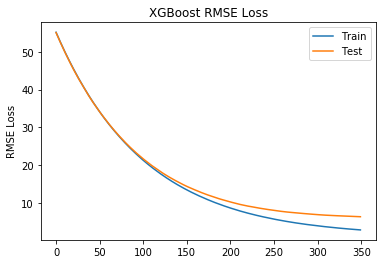



Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


For training set
r2_score: 0.988373
For test set
r2_score: 0.810937


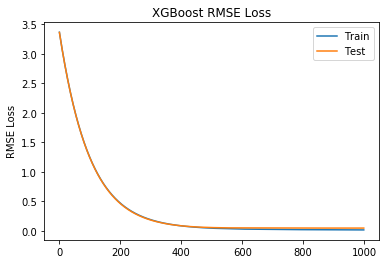



Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


For training set
r2_score: 0.948893
For test set
r2_score: 0.710904


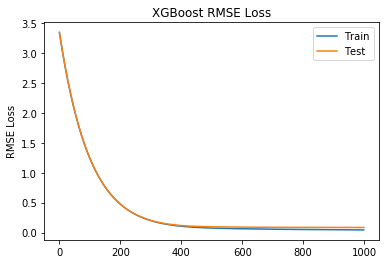



Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


For training set
r2_score: 0.907959
For test set
r2_score: 0.595256


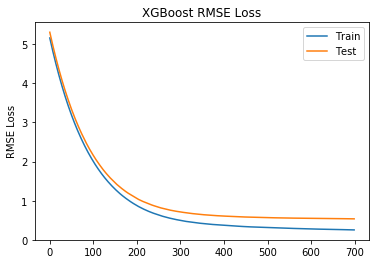



New_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


For training set
r2_score: 0.988427
For test set
r2_score: 0.823964


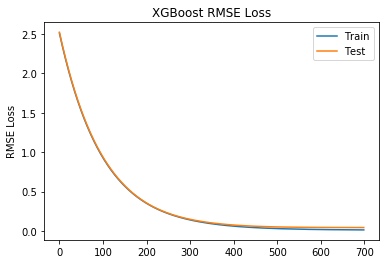



Enjoyment__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


For training set
r2_score: 0.950068
For test set
r2_score: 0.721143


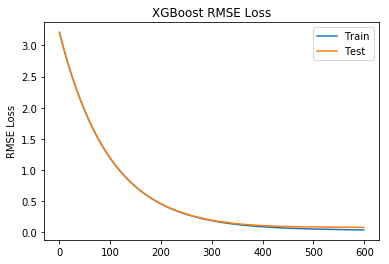



Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


For training set
r2_score: 0.980357
For test set
r2_score: 0.816869


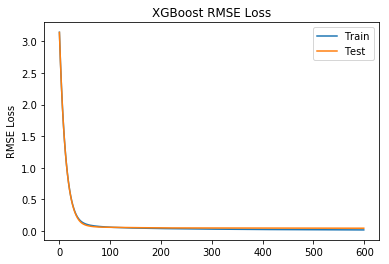



Understanding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


For training set
r2_score: 0.997909
For test set
r2_score: 0.823333


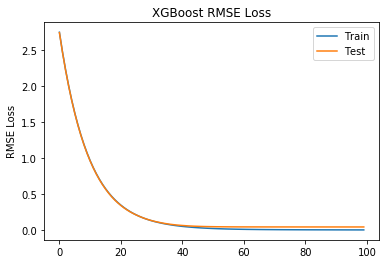



Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


For training set
r2_score: 0.974158
For test set
r2_score: 0.834081


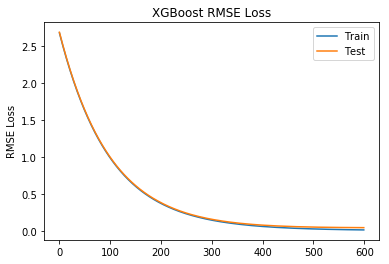



Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


For training set
r2_score: 0.992359
For test set
r2_score: 0.792974


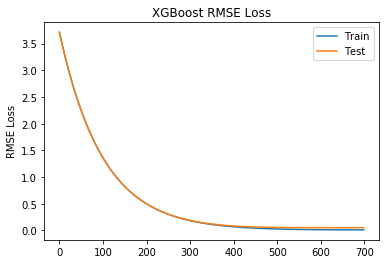



Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


For training set
r2_score: 0.986217
For test set
r2_score: 0.828118


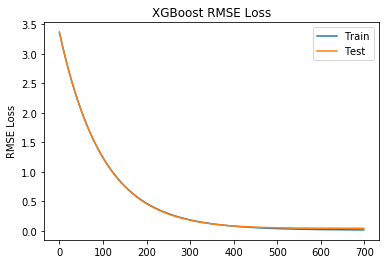

In [29]:
models = model.train(X_train,y_train,X_test,y_test,metrics='r2')

# Evaluation Class

In [133]:
class Evaluate:
    
    def __init__(self,models,model_type = 'ranf'):
        self.models = models
        self.model_type = 'ranf'
        
    def evaluate(self,X_test,y_test,metrics='r2_score'):
        
        try:
            X = X_test.drop('Video_name',1)
        except:
            X = X_test
        for i in range(y_test.shape[1]):
            print(y_test.columns[i],"\n")
            preds = self.models[i].predict(X)
            if metrics == 'r2_score':
                r2score = r2_score(preds,y_test.iloc[:,i])
                print("R2_SCORE %f" % r2score)
            elif metrics == 'rmse':
                rmse = math.sqrt(mean_squared_error(preds,y_test.iloc[:,i]))
                print("RMSE %f" % rmse)
                
    def plot_feature_importance(self,figsize,output_columns,feature_columns,savefig=False):
        try: 
            feature_columns = feature_columns.remove('Video_name')
        except:
            pass
        
        if self.model_type == 'ranf' or self.model_type == 'DT':
            for i in range(len(output_columns)):
                print(output_columns[i])
                importances = self.models[i].feature_importances_
                if self.model_type == 'ranf':
                    std = np.std([tree.feature_importances_ for tree in self.models[i].estimators_],
                                 axis=0)
                indices = np.argsort(importances)[::-1]

                # Print the feature ranking
                print("Feature ranking:")

                for f in range(len(feature_columns)):
                    print("%d. %s (%f)" % (f + 1, feature_columns[indices[f]], importances[indices[f]]))
                    

                # Plot the feature importances of the forest
                
                plt.title(output_columns[i])
                plt.barh(range(len(indices[0:8])), importances[indices[0:8]], color='b', align='center')
                plt.yticks(range(len(indices[0:8])), [feature_columns[i] for i in indices[0:8]])
                plt.xlabel('Relative Importance')
#                 plt.title("Feature importances")
                if savefig:
                    plt.savefig(feature_columns[i]+'_'+ self.model_type+'.png')
                plt.show()
                
        else:
            for i in range(len(feature_columns)):
                xgb.plot_importance(self.models[i],max_num_features = 8,xlabel='Gain',title =feature_columns[i]+ ' Importance plot')
#             xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Cross Validation R2:' + str(round(np.max(scores),3)) )
            
                plt.rcParams['figure.figsize'] = [30,15]
                plt.rcParams['figure.dpi'] = 100
                matplotlib.rcParams.update({'font.size': 22})
                if savefig:
                    plt.savefig(feature_columns[i]+'_XGB_Plot.png')
                plt.show()
        
        

In [134]:
evaluate = Evaluate(models,'ranf')

In [135]:
evaluate.evaluate(X_test,y_test)

In [136]:
evaluate.plot_feature_importance(figsize =10,y_test.columns,X_test.columns[1:])

SyntaxError: positional argument follows keyword argument (<ipython-input-136-5df79fddf1d7>, line 1)

In [137]:
y_test.columns

Index([], dtype='object')